### 0. Описание задачи

Набор данных для прогнозирования диабета представляет собой набор медицинских и демографических данных от пациентов, а также их диабетический статус (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, болезни сердца, история курения, уровень HbA1c и глюкозы в крови. Этот набор данных может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно медицинским работникам при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения. Кроме того, набор данных может быть использован исследователями для изучения взаимосвязи между различными медицинскими и демографическими факторами и вероятностью развития диабета.

Характеристики датасета:
- gender: Гендер относится к биологическому полу человека, который может оказывать влияние на его восприимчивость к диабету
- age: Возраст
- hypertension: Гипертония - это заболевание, при котором кровяное давление в артериях постоянно повышено
- heart_disease: Болезни сердца - это еще одно заболевание, которое связано с повышенным риском развития диабета
- smoking_history: Курение в анамнезе также считается фактором риска развития диабета и может усугубить связанные с ним осложнения
- bmi: ИМТ (индекс массы тела) - это показатель жировых отложений в организме, основанный на весе и росте
- HbA1c_level: Уровень HbA1c (гемоглобина A1c) - это показатель среднего уровня сахара в крови человека за последние 2-3 месяца
- blood_glucose_level: Уровень глюкозы в крови относится к количеству глюкозы в кровотоке в данный момент времени
- diabetes: Диабет является прогнозируемой целевой переменной, значения которой равны 1, указывающей на наличие диабета, и 0

Задача состоит в том, чтобы по набору данных составить модель, которая будет прогнозировать наличие диабета у человека

### 1. Прочитать данные

подключаем нужные библиотеки:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
%matplotlib inline
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

указываем путь до файла:

In [9]:
df = pd.read_csv("C:\\Users\\popov\\Downloads\\diabetes_prediction_dataset.csv")
SAMPLE_SIZE = 50000 
dfqqq = df.sample(n=SAMPLE_SIZE, random_state=42).reset_index(drop=True)

In [10]:
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [11]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [13]:
df = df[df['gender'].isin(['Male', 'Female'])]
df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')

### 2. Визуализировать данные и вычислить основные характеристики

In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Средний возраст пациента - 42 года. Гипертония есть у 7.5% клиентов, проблемы с сердцем у 4%, индекс bmi - 27, показатель гемоглобина - 5.5, уровень глюкозы в крови - 138, диабет есть у 8.5% пациентов.

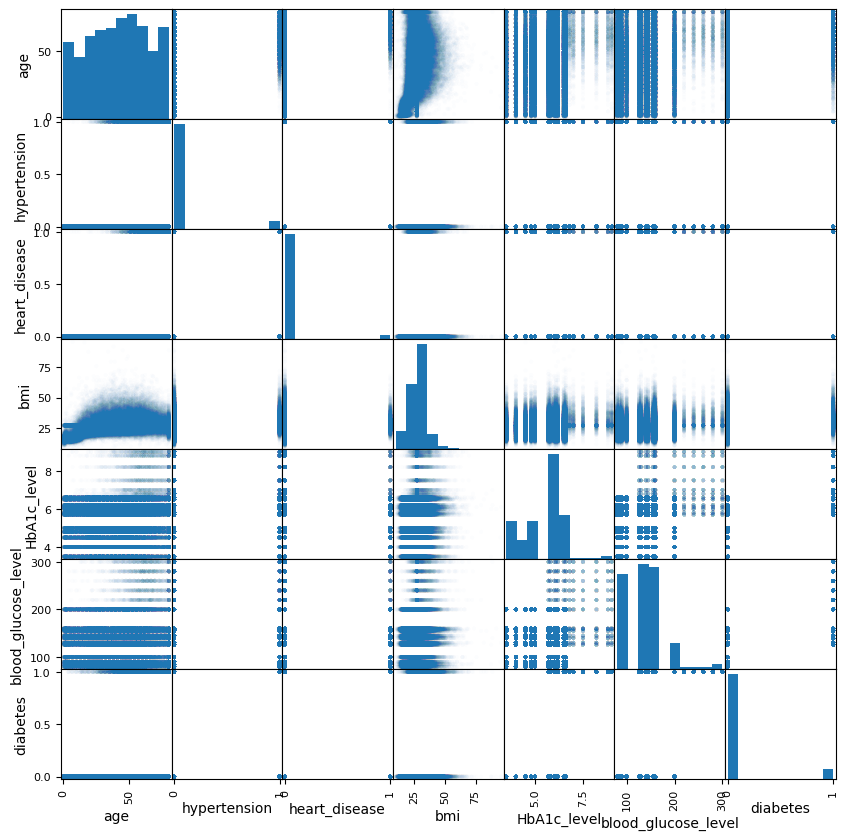

In [17]:
scatter_matrix(df, alpha = .01, figsize = (10, 10))
plt.show()
pass

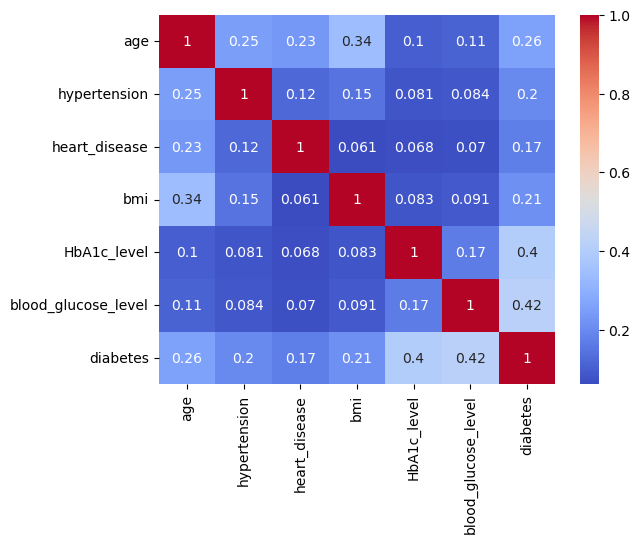

In [18]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

Сильной корелляции между признаками не наблюдается

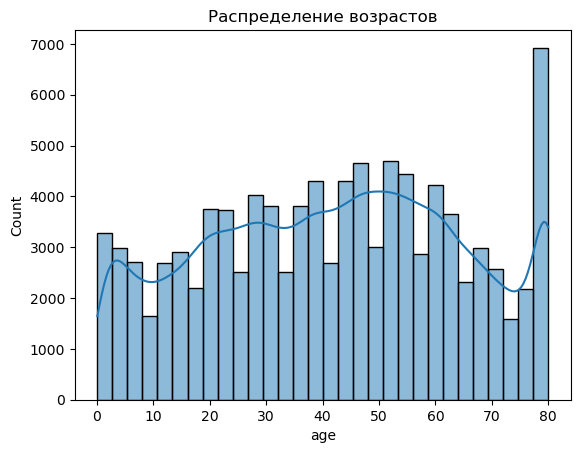

In [20]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возрастов')
plt.show()

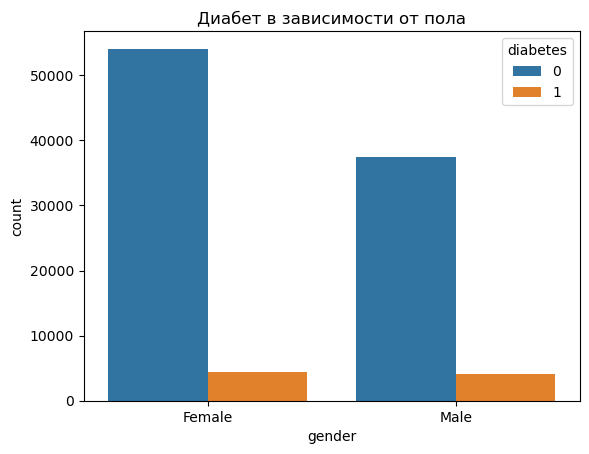

In [21]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Диабет в зависимости от пола')
plt.show()

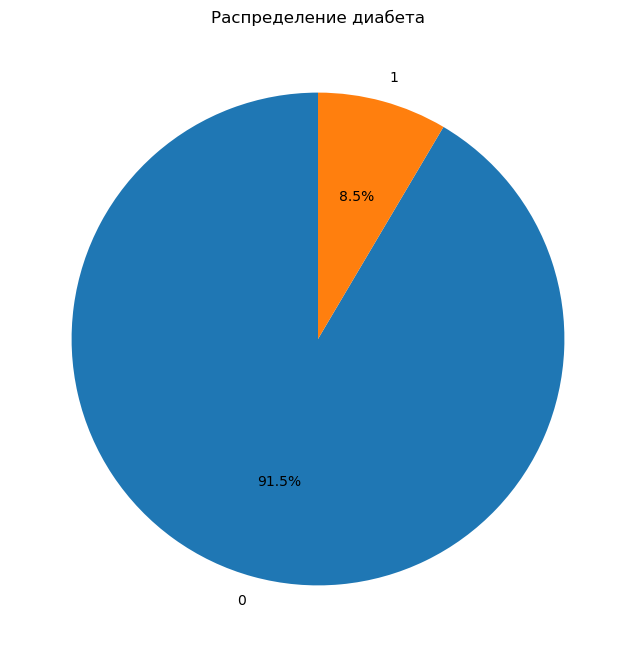

In [22]:
df['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение диабета')
plt.ylabel('')
plt.show()

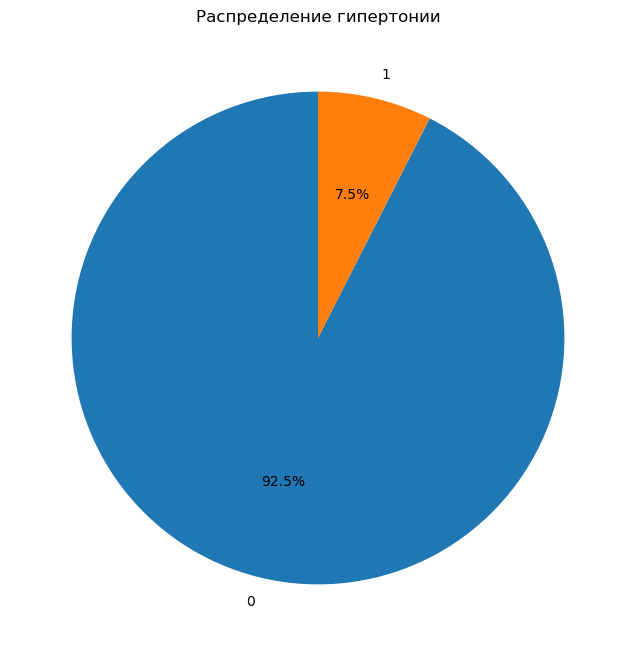

In [23]:
df['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение гипертонии')
plt.ylabel('')
plt.show()

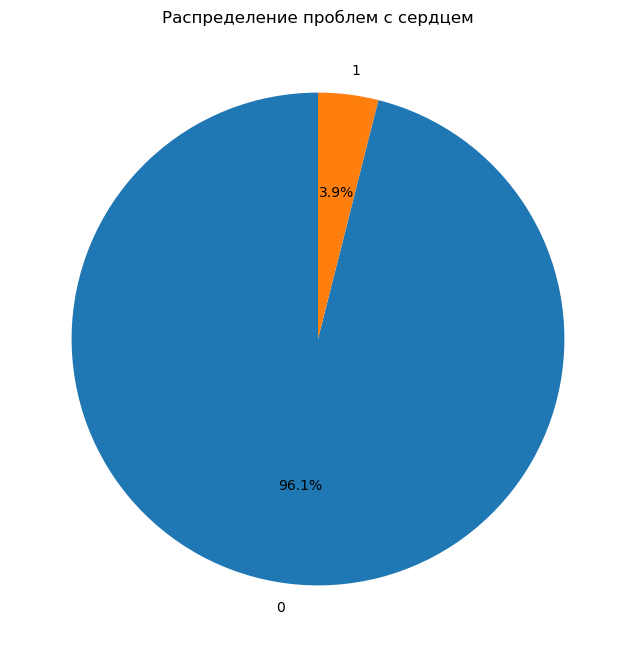

In [24]:
df['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение проблем с сердцем')
plt.ylabel('')
plt.show()

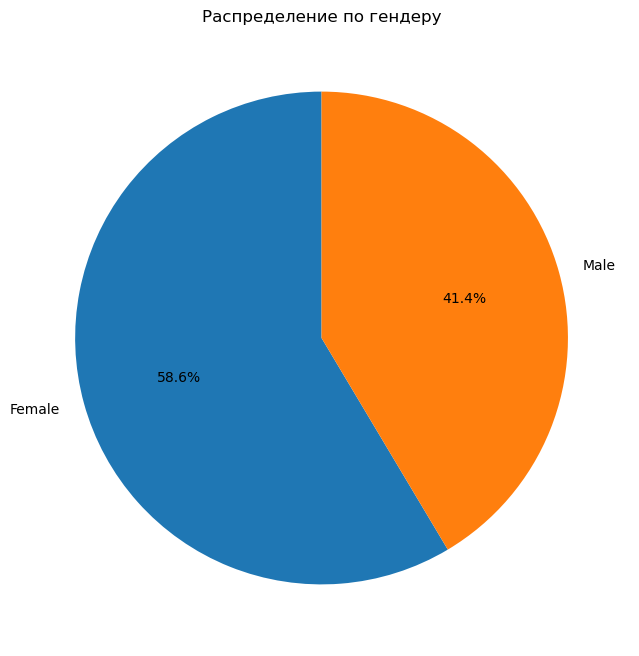

In [25]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение по гендеру')
plt.ylabel('')
plt.show()

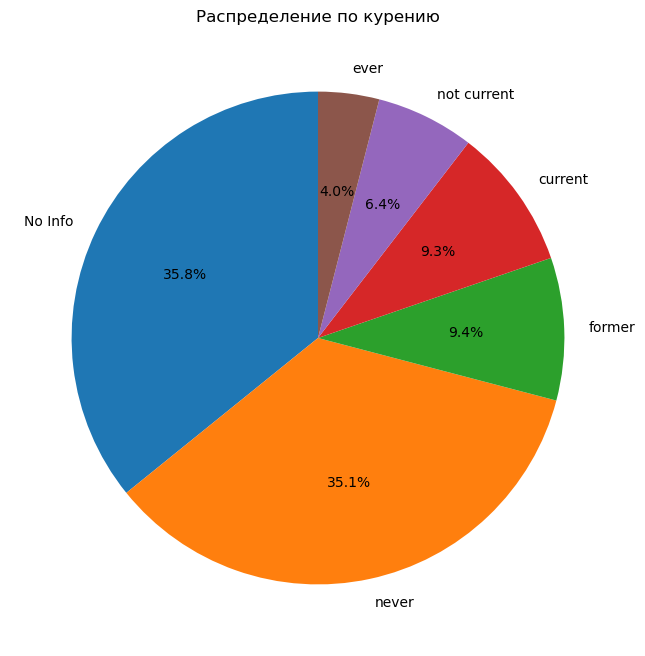

In [26]:
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение по курению')
plt.ylabel('')
plt.show()

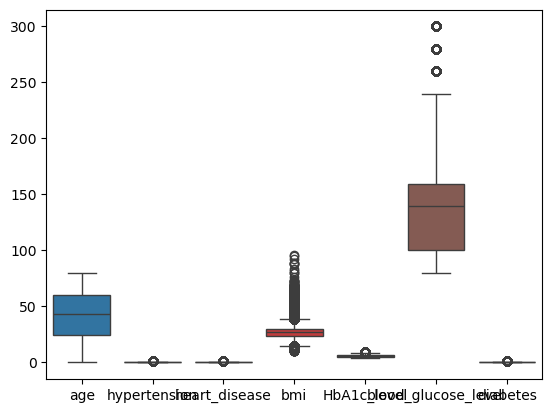

In [27]:
sns.boxplot(df)
plt.show()
pass

Обработаем выбросы

In [29]:
df.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995], numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0.005,0.56,0.0,0.0,13.8900,3.5,80.0,0.0
0.010,1.08,0.0,0.0,14.6000,3.5,80.0,0.0
0.050,4.00,0.0,0.0,16.8200,3.5,80.0,0.0
0.100,10.00,0.0,0.0,19.1800,4.0,85.0,0.0
0.500,43.00,0.0,0.0,27.3200,5.8,140.0,0.0
0.900,73.00,0.0,0.0,35.4700,6.6,200.0,0.0
0.950,80.00,1.0,0.0,39.4900,6.6,200.0,1.0
0.990,80.00,1.0,1.0,48.7919,8.8,280.0,1.0
0.995,80.00,1.0,1.0,52.5000,9.0,300.0,1.0


In [30]:
rows_to_drop = df[
    (df['bmi'] < df['bmi'].quantile(0.005)) | (df['bmi'] > df['bmi'].quantile(0.995)) |
    (df['blood_glucose_level'] < df['blood_glucose_level'].quantile(0.005)) | (df['blood_glucose_level'] > df['blood_glucose_level'].quantile(0.97))].index
df = df.drop(rows_to_drop)

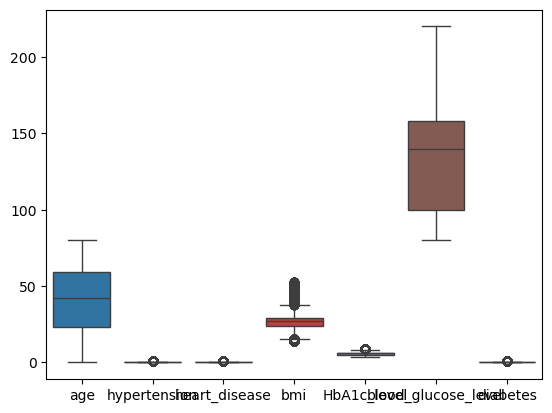

In [31]:
sns.boxplot(df)
plt.show()

### 3. Обработать пропущенные значения (или убедиться что их нет)

In [33]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Пропущенных значений нет 

### 4. Обработать категориальные признаки

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96366 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96366 non-null  category
 1   age                  96366 non-null  float64 
 2   hypertension         96366 non-null  int64   
 3   heart_disease        96366 non-null  int64   
 4   smoking_history      96366 non-null  category
 5   bmi                  96366 non-null  float64 
 6   HbA1c_level          96366 non-null  float64 
 7   blood_glucose_level  96366 non-null  int64   
 8   diabetes             96366 non-null  int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 6.1 MB


Разделим столбцы на категориальные и численные

In [38]:
num_colum = [c for c in df.columns if df[c].dtype.name != 'category']
categor_colum = [c for c in df.columns if df[c].dtype.name == 'category']
num_colum.remove('diabetes')
data_describe = df.describe(include = ['category'])

Разделим категориальные признаки на бинарные и небинарные

In [40]:
binary_columns    = [c for c in categor_colum if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categor_colum if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender'] ['smoking_history']


In [41]:
print(df['gender'].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Заменим в бинарном признаке значения Female и Male на 0 и 1

In [43]:
for col in binary_columns:
    df = df.replace({col: {'Female': 0, 'Male': 1}})
    print(df[col].describe())
    print()

count     96366
unique        2
top           0
freq      56535
Name: gender, dtype: int64



Для небинарных признаков: разделим каждый признак с s значениями на s признаков со значениями 0 и 1

In [45]:
data_nonbin = pd.get_dummies(df[nonbinary_columns])
data_nonbin[data_nonbin.select_dtypes('bool').columns] = data_nonbin.select_dtypes('bool').astype(int)
data_nonbin.describe()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,0.361185,0.092481,0.040024,0.091350,0.350954,0.064006
std,0.480347,0.289705,0.196018,0.288107,0.477271,0.244765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Нормализация числовых признаков

In [47]:
data_num = df[num_colum]
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,41.524580,0.070160,0.036714,27.122088,5.488486,134.399747
std,22.399596,0.255417,0.188060,6.155209,1.044441,34.528515
min,0.080000,0.000000,0.000000,13.890000,3.500000,80.000000
25%,23.000000,0.000000,0.000000,23.580000,4.800000,100.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000
75%,59.000000,0.000000,0.000000,29.290000,6.200000,158.000000
max,80.000000,1.000000,1.000000,52.500000,9.000000,220.000000


Выполним нормализацию числовых данных

In [49]:
data_num = (data_num - data_num.mean()) / data_num.std()
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04
mean,2.612387e-16,6.134649e-17,-2.005558e-17,1.445182e-17,1.651636e-17,4.087800e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.850238e+00,-2.746864e-01,-1.952258e-01,-2.149738e+00,-1.903875e+00,-1.575502e+00
25%,-8.270051e-01,-2.746864e-01,-1.952258e-01,-5.754619e-01,-6.591903e-01,-9.962707e-01
50%,2.122449e-02,-2.746864e-01,-1.952258e-01,3.215352e-02,2.982594e-01,1.621921e-01
75%,7.801667e-01,-2.746864e-01,-1.952258e-01,3.522076e-01,6.812392e-01,6.835004e-01
max,1.717684e+00,3.640478e+00,5.122221e+00,4.122997e+00,3.362098e+00,2.479118e+00


Соединим все столбцы в одну таблицу

In [51]:
df = pd.concat((data_num, data_nonbin, df[binary_columns], df['diabetes']), axis = 1)
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
count,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,2.612387e-16,6.134649e-17,-2.005558e-17,1.445182e-17,1.651636e-17,4.087800e-16,0.361185,0.092481,0.040024,0.091350,0.350954,0.064006,0.059316
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.480347,0.289705,0.196018,0.288107,0.477271,0.244765,0.236216
min,-1.850238e+00,-2.746864e-01,-1.952258e-01,-2.149738e+00,-1.903875e+00,-1.575502e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.270051e-01,-2.746864e-01,-1.952258e-01,-5.754619e-01,-6.591903e-01,-9.962707e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.122449e-02,-2.746864e-01,-1.952258e-01,3.215352e-02,2.982594e-01,1.621921e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.801667e-01,-2.746864e-01,-1.952258e-01,3.522076e-01,6.812392e-01,6.835004e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.717684e+00,3.640478e+00,5.122221e+00,4.122997e+00,3.362098e+00,2.479118e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6. Разбиение данных на обучающую и тестовую выборки

Разделим данные в процентном соотношении 85 к 15

In [54]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train.shape[0], X_test.shape[0]

(81911, 14455)

### 7. Классификатор ближайших соседей

In [57]:
k_n = KNeighborsClassifier(n_neighbors=3)
k_n.fit(X_train, y_train)

y_train_predict = k_n.predict(X_train)
y_test_predict = k_n.predict(X_test)
errr_train = np.around(np.mean(y_train != y_train_predict) * 100, 2)
errr_test = np.around(np.mean(y_test != y_test_predict) * 100, 2)
d_errr = np.around(errr_test - errr_train, 2)
print(f"Ошибка на обучающей выборке составила: {errr_train}%, а на тестовой: {errr_test}%")
print(f'Точность на обучающей выборке составила: {np.around(accuracy_score(y_train, y_train_predict)*100, 2)}%')
print(f'Точность на тестовой выборке составила: {np.around(accuracy_score(y_test, y_test_predict)*100, 2)}%')
print(f'Разница между ошибками получилась: {d_errr}%')

Ошибка на обучающей выборке составила: 2.76%, а на тестовой: 3.95%
Точность на обучающей выборке составила: 97.24%
Точность на тестовой выборке составила: 96.05%
Разница между ошибками получилась: 1.19%


### 8. Подбор гиперпараметров

In [59]:
n = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': n})
grid.fit(X_train, y_train)

best_err = 1 - grid.best_score_
best_n = grid.best_estimator_.n_neighbors
print(f"Оптимальным параметром оказалось значение n = {best_n}")

Оптимальным параметром оказалось значение n = 11


### 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

In [61]:
knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train, y_train)
err_train = np.around((1 - knn.score(X_train, y_train)) * 100, 2)
err_test = np.around((1 - knn.score(X_test, y_test)) * 100, 2)
d_err = np.around(err_test - err_train, 2) 
print(f"Ошибка на обучающей выборке составила: {err_train}%, а на тестовой: {err_test}%")
print(f'Точность на обучающей выборке составила: {100 - err_train}%')
print(f'Точность на тестовой выборке составила: {100 - err_test}%')
print(f'Разница между ошибками получилась: {d_err}%')

Ошибка на обучающей выборке составила: 3.67%, а на тестовой: 3.7%
Точность на обучающей выборке составила: 96.33%
Точность на тестовой выборке составила: 96.3%
Разница между ошибками получилась: 0.03%


После подбора гиперпараметра, получилось сократить разницу между ошибками на обучающей и тестовой выборках, что означает более качественное обучение модели

### 10. Запустить другие классификаторы и выбать параметры. Сравнить результаты

In [64]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"\n=== {name} ===")
    print(f"Точность на обучающей выборке: {accuracy_score(y_train, y_train_pred) * 100 :.2f}%")
    print(f"Точность на тестовой выборке: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
    print(f"F1-score test: {f1_score(y_test, y_test_pred) * 100:.2f}%")
    if y_test_proba is not None:
        print(f"ROC-AUC test  : {roc_auc_score(y_test, y_test_proba) * 100:.2f}%")
    
    return {
        'name': name,
        'accuracy_test': np.around(accuracy_score(y_test, y_test_pred) * 100, 2),
        'f1_test': np.around(f1_score(y_test, y_test_pred) * 100, 2),
        'roc_auc': np.around(roc_auc_score(y_test, y_test_proba) * 100, 2) if y_test_proba is not None else None
    }

In [65]:
results = []

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
results.append(evaluate_model(logreg, "Logistic Regression"))

rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1, class_weight='balanced')
results.append(evaluate_model(rf, "Random Forest"))

mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)
results.append(evaluate_model(mlp, "MLP Classifier"))

lgbm = LGBMClassifier(n_estimators=400, max_depth=8, learning_rate=0.05, random_state=42, class_weight='balanced', verbose=-1)
results.append(evaluate_model(lgbm, "LightGBM"))

results.append(evaluate_model(knn, f"KNN (k = {best_n})"))


=== Logistic Regression ===
Точность на обучающей выборке: 85.56%
Точность на тестовой выборке: 85.69%
F1-score test: 41.44%
ROC-AUC test  : 95.07%

=== Random Forest ===
Точность на обучающей выборке: 86.30%
Точность на тестовой выборке: 86.20%
F1-score test: 43.63%
ROC-AUC test  : 96.84%

=== MLP Classifier ===
Точность на обучающей выборке: 96.97%
Точность на тестовой выборке: 97.25%
F1-score test: 69.71%
ROC-AUC test  : 96.65%

=== LightGBM ===
Точность на обучающей выборке: 89.74%
Точность на тестовой выборке: 89.12%
F1-score test: 48.65%
ROC-AUC test  : 97.08%

=== KNN (k = 11) ===
Точность на обучающей выборке: 96.33%
Точность на тестовой выборке: 96.30%
F1-score test: 56.40%
ROC-AUC test  : 91.72%


In [66]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_test', 'roc_auc'], ascending=False)
results_df

,name,accuracy_test,f1_test,roc_auc
2,MLP Classifier,97.25,69.71,96.65
4,KNN (k = 11),96.30,56.40,91.72
3,LightGBM,89.12,48.65,97.08
1,Random Forest,86.20,43.63,96.84
0,Logistic Regression,85.69,41.44,95.07


Как видно из таблицы, лучший показатель обучаемости показал MLP Classifier. Это значит, что нейронная сеть лучше всего научилась находить именно больных диабетом (меньше ложно-отрицательных), что в медицинской задаче критически важно.

### 11. Борьба с несбалансированностью классов

In [69]:
print("Распределение классов в тренировочной выборке:")
print(y_train.value_counts(normalize=True))
print(f"Доля больных диабетом: {(y_train.mean()*100):.2f}%")

Распределение классов в тренировочной выборке:
diabetes
0    0.940325
1    0.059675
Name: proportion, dtype: float64
Доля больных диабетом: 5.97%


In [70]:
mlp_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('mlp', MLPClassifier(
        random_state=42,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(100, 50), (128, 64), (128, 64, 32)],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate_init': [0.001, 0.005]
}

grid_search = GridSearchCV(
    mlp_pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Запускаем поиск лучших параметров с SMOTE...")
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1 на кросс-валидации:", grid_search.best_score_.round(4))

Запускаем поиск лучших параметров с SMOTE...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (128, 64, 32), 'mlp__learning_rate_init': 0.005}
Лучший F1 на кросс-валидации: 0.507



ФИНАЛЬНЫЕ МЕТРИКИ НА ТЕСТЕ:
Accuracy : 0.9120
F1-score : 0.5085
ROC-AUC  : 0.9532

Classification Report:
              precision    recall  f1-score   support

 Нет диабета       0.99      0.92      0.95     13627
      Диабет       0.37      0.79      0.51       828

    accuracy                           0.91     14455
   macro avg       0.68      0.86      0.73     14455
weighted avg       0.95      0.91      0.93     14455



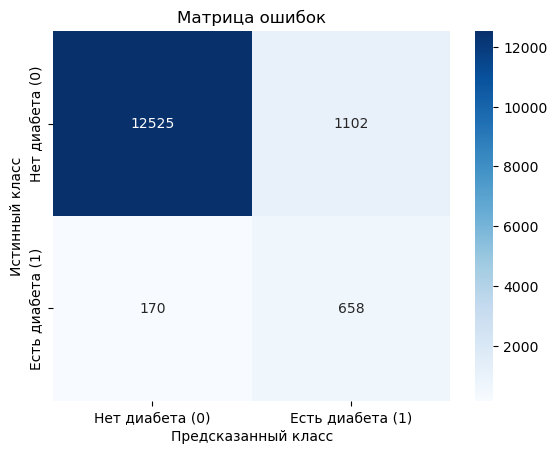

In [71]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nФИНАЛЬНЫЕ МЕТРИКИ НА ТЕСТЕ:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Нет диабета', 'Диабет']))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Нет диабета (0)', 'Есть диабета (1)'],
                yticklabels=['Нет диабета (0)', 'Есть диабета (1)'])
plt.title(f'Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

### 12. Исключение сильно коррелированных признаков

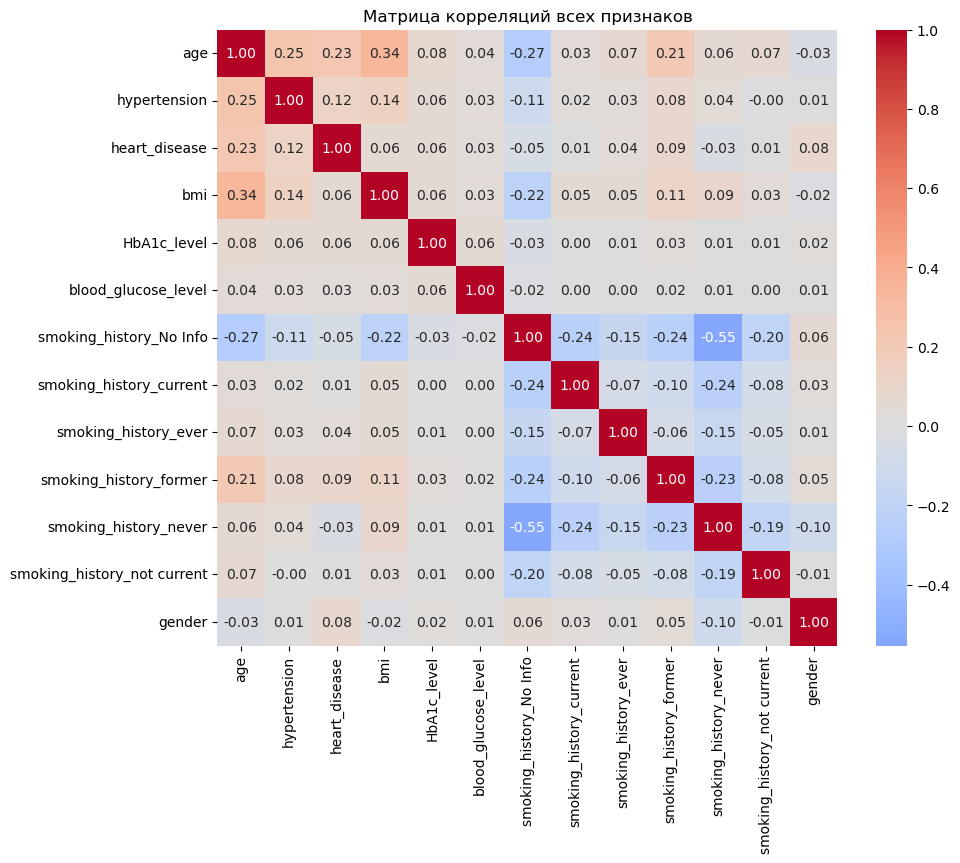

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Матрица корреляций всех признаков")
plt.show()

In [74]:
corr_matrix = X_train.corr().abs()
corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr = corr_matrix.max().max()

print(f"\nМаксимальная корреляция между любыми двумя признаками: {max_corr:.3f}")
print("Пары с корреляцией > 0.7:")
high_corr = corr_matrix.stack()
high_corr = high_corr[high_corr > 0.7]
print(high_corr if not high_corr.empty else "→ Таких нет")


Максимальная корреляция между любыми двумя признаками: 0.553
Пары с корреляцией > 0.7:
→ Таких нет


### 13. Выводы

1) Лучшая модель — **MLPClassifier** по классу «Диабет» → находит почти 80 % больных (recall ≈ 0.78)
2) Были протестированы: KNN, Random Forest, LightGBM, логистическая регрессия → нейронная сеть оказалась самой точной
3) Проблема дисбаланса (8.5 % больных) решена с помощью **SMOTE** → качество предсказания редкого класса выросло
4) Все признаки оказались полезными — сильной корреляции между ними нет

In [123]:
from sklearn.preprocessing import StandardScaler
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Понижение размерности с помощью PCA

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

### 14. Метод KMeans

Обучение модели

In [156]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

Визуализация

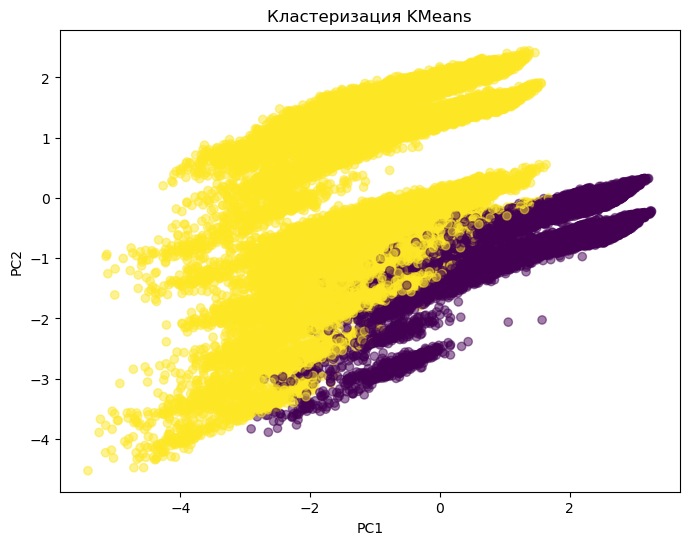

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, alpha=0.5)
plt.title("Кластеризация KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Сравнение с истинными метками

In [170]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_kmeans

-0.02181289136930396

### 15. Метод DBSCAN

Обучение модели

In [174]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

Визуализация

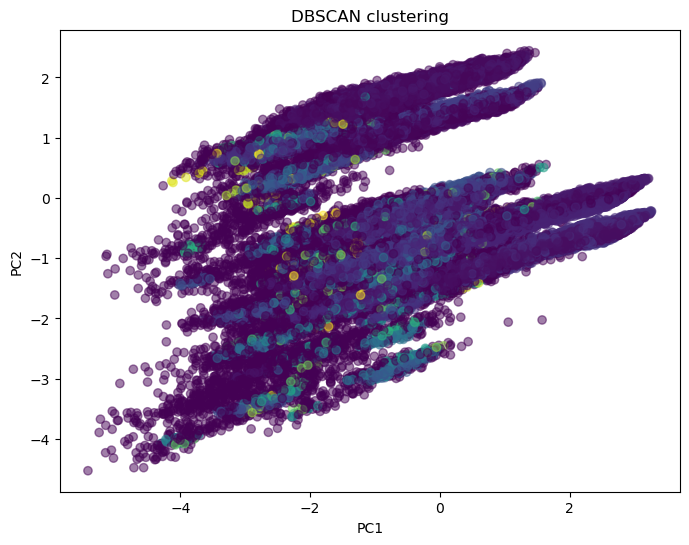

In [182]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, alpha=0.5)
plt.title("DBSCAN clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Сравнение с истинными метками

In [185]:
mask = dbscan_labels != -1
ari_dbscan = adjusted_rand_score(y[mask], dbscan_labels[mask])
ari_dbscan

0.001033187964242909

### 16. Метод Agglomerative Clustering

Обучение модели

In [199]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

connectivity = kneighbors_graph(X_scaled, n_neighbors=10, include_self=False)

agg_full = AgglomerativeClustering(n_clusters=2, connectivity=connectivity)
agg_labels_full = agg_full.fit_predict(X_scaled)

Визуализация

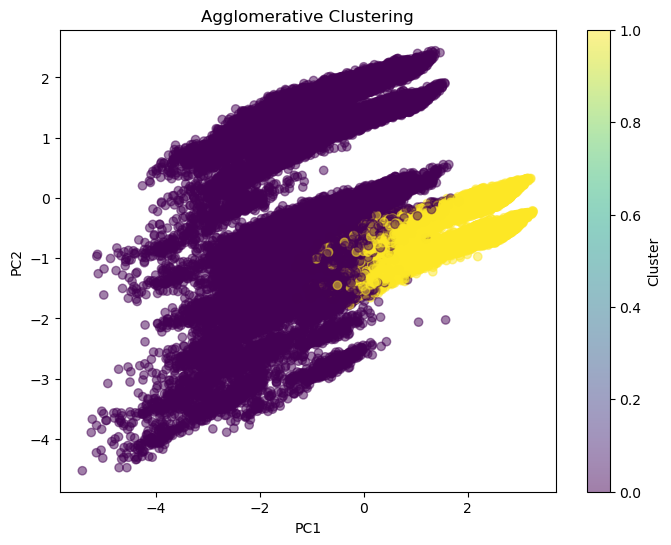

In [214]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels_full, alpha=0.5, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

Сравнение с истинными метками

In [217]:
ari_agg = adjusted_rand_score(y, agg_labels_full)
ari_agg

-0.028910742381606867

In [221]:
print(f"ARI KMeans: {ari_kmeans}")
print(f"ARI DBSCAN: {ari_dbscan}")
print(f"ARI Agglomerative: {ari_agg}")

ARI KMeans: -0.02181289136930396
ARI DBSCAN: 0.001033187964242909
ARI Agglomerative: -0.028910742381606867


### 17. Выводы

Все три метода показали крайне низкие значения индекса $ARI$ (близкие к 0 или отрицательные). Это говорит о том, что структура данных, выявленная алгоритмами обучения без учителя, практически не совпадает с логикой целевой переменной $y$ из исходного датасета.